# Shubhankar Sharma 
# NLP

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
!pip install bs4

Data PreProcessing

In [3]:
url = "https://www.who.int/news-room/fact-sheets/detail/mental-health-strengthening-our-response"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
#all the paragraphs are separated
paragraphs = soup.find_all('p')
#the text of all the paragraphs have been joined using space
blog_text = " ".join([para.text for para in paragraphs])

data = pd.DataFrame({'Text': [blog_text]})


In [4]:
data

,Text
0,Concepts in mental health Mental health is a s...


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
class Preprocess:
# Function for text cleaning
    def clean_text(text):
        text = re.sub(r'\s+', ' ', text)  # More than one space is replaced with a single ' '
        text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove numbers and special characters as they provide no meaning to the text
        text = text.lower()
        return text

    # Function for text pre-processing
    def preprocess_text(text):
        text = Preprocess.clean_text(text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens)

# Applying pre-processing
data['Cleaned_Text'] = data['Text'].apply(Preprocess.preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Exploratory Data Analysis

In [6]:
!pip install wordcloud

Counter({'mental': 43, 'health': 42, 'risk': 11, 'condition': 10, 'people': 9, 'well': 8, 'community': 8, 'social': 8, 'individual': 7, 'factor': 7, 'care': 7, 'work': 5, 'promotion': 5, 'prevention': 5, 'intervention': 5, 'action': 5, 'based': 5, 'country': 5, 'life': 4, 'determinant': 4, 'emotional': 4, 'plan': 4, 'state': 3, 'human': 3, 'right': 3, 'economic': 3, 'include': 3, 'protect': 3, 'undermine': 3, 'also': 3, 'protective': 3, 'strengthen': 3, 'population': 3, 'environment': 3, 'sector': 3, 'programme': 3, 'effective': 3, 'promoting': 3, 'implementing': 3, 'strategy': 3, 'better': 3, 'ability': 2, 'contribute': 2, 'collective': 2, 'make': 2, 'build': 2, 'world': 2, 'development': 2, 'disorder': 2, 'continuum': 2, 'distress': 2, 'different': 2, 'outcome': 2, 'self': 2, 'experience': 2, 'level': 2, 'throughout': 2, 'structural': 2, 'psychological': 2, 'skill': 2, 'exposure': 2, 'environmental': 2, 'including': 2, 'occur': 2, 'early': 2, 'particularly': 2, 'example': 2, 'known':

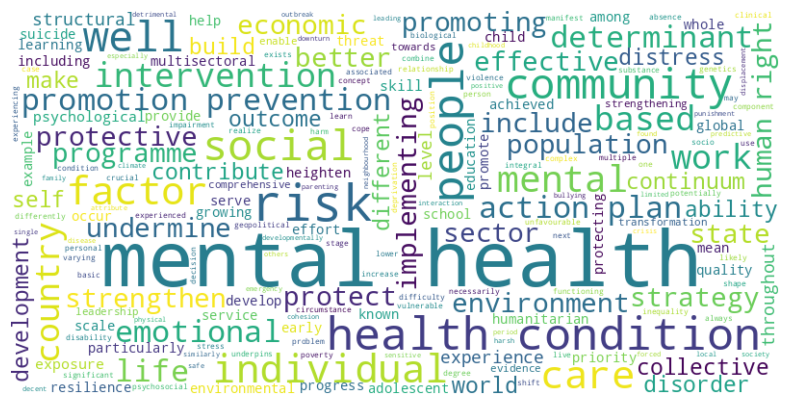

Top 10 Bigrams: [('mental health', 37), ('health condition', 9), ('promotion prevention', 4), ('action plan', 4), ('mental well', 3), ('human right', 3), ('people mental', 3), ('individual social', 3), ('risk factor', 3), ('protective factor', 3)]
Top 10 words for Topic #0:
['care', 'factor', 'individual', 'social', 'community', 'people', 'condition', 'risk', 'health', 'mental']
Top 10 words for Topic #1:
['legislation', 'context', 'concept', 'likely', 'limited', 'limiting', 'live', 'lived', 'law', 'organizational']
Top 10 words for Topic #2:
['legislation', 'context', 'concept', 'likely', 'limited', 'limiting', 'live', 'lived', 'law', 'organizational']
Top 10 words for Topic #3:
['legislation', 'context', 'concept', 'likely', 'limited', 'limiting', 'live', 'lived', 'law', 'organizational']
Top 10 words for Topic #4:
['legislation', 'context', 'concept', 'likely', 'limited', 'limiting', 'live', 'lived', 'law', 'organizational']


In [7]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# This just counts the frequency of all the words that appear on the blog
all_words = " ".join(data['Cleaned_Text']).split()
word_freq = Counter(all_words)
print(word_freq)

# Plotting Word Cloud -- THIS IS JUST A BETTER WAY TO VISUALISE THE MOST FREQUENT WORDS ITSELF
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Getting the top n-grams
def get_top_n_grams(text, n, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams = get_top_n_grams(data['Cleaned_Text'], 10, ngram_range=(2, 2))
print("Top 10 Bigrams:", bigrams)

# Topic Modeling using LDA
def topic_modeling(text, n_topics=5):
    vectorizer = CountVectorizer(max_df=2, min_df=0.9, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(text)
    LDA = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    LDA.fit(doc_term_matrix)

    for i, topic in enumerate(LDA.components_):
        print(f"Top 10 words for Topic #{i}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

topic_modeling(data['Cleaned_Text'])


Insights
As per the wordcloud, the top few terms that we observe are:
1. risk
2. intervention
3. community
4. individual
5. collective

This gives us an idea that the blog data is concerened with the severity of the mental health conditions as well as exploring the solutions of these conditions with the help of both individual efforts along with community collaboration.


We can also do a sentiment analysis of the blog data to get an overall sentiment of the blog.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

#the fucntion for the sentiment intesnity analyser is as under
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    return sia.polarity_scores(text)

# Applying sentiment analysis
data['Sentiment_Scores'] = data['Cleaned_Text'].apply(get_sentiment)

# Splitting sentiment scores into separate columns -- getting each sentiment score into a different column
data['Positive'] = data['Sentiment_Scores'].apply(lambda x: x['pos'])
data['Negative'] = data['Sentiment_Scores'].apply(lambda x: x['neg'])
data['Neutral'] = data['Sentiment_Scores'].apply(lambda x: x['neu'])
data['Compound'] = data['Sentiment_Scores'].apply(lambda x: x['compound'])

# Categorizing the overall sentiment based on the compound score
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Compound'].apply(categorize_sentiment)

print(data[['Cleaned_Text', 'Positive', 'Negative', 'Neutral', 'Compound', 'Sentiment']])


                                        Cleaned_Text  Positive  Negative  \
0  concept mental health mental health state ment...     0.225      0.14   

   Neutral  Compound Sentiment  
0    0.635    0.9944  Positive  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


The sentiment on the page is largely positive indicating a positive outlook towards the treatment of mental health and indicating hope

As of now, we have been able to underline the important aspects of the issue of mental health and have been able to underline the overall trend of the blog